In [211]:
# coding: UTF-8
# import time
# import torch
# from train_eval import train, init_network
# from importlib import import_module

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial']  #防止中文乱码，还可以有Microsoft YaHei, Times New Roman, Arial
plt.rcParams["axes.unicode_minus"] = False   #字符显示，防止负号乱码

import warnings
warnings.filterwarnings('ignore')

In [212]:
# '''
#     emdding_arg: str     # random or pre_trained
#     model_arg: str       # TextCNN, TextRNN, FastText, TextRCNN, TextRNN_Att, DPCNN, Transformer
#     word_arg: bool       #  True for word, False for char
# '''

# def run_model(embedding_arg = "pre_trained", model_arg = "TextCNN", word_arg = False):
#     dataset = 'THUCNews'  # 数据集

#     # 搜狗新闻:embedding_SougouNews.npz, 腾讯:embedding_Tencent.npz, 随机初始化:random
#     embedding = 'embedding_SougouNews.npz'
#     if embedding_arg == 'random':
#         embedding = 'random'

#     model_name = model_arg  
#     if model_name == 'FastText':
#         from utils_fasttext import build_dataset, build_iterator, get_time_dif
#         embedding = 'random'
#     else:
#         from utils import build_dataset, build_iterator, get_time_dif

#     x = import_module('models.' + model_name)
#     config = x.Config(dataset, embedding)
#     np.random.seed(1)
#     torch.manual_seed(1)
#     torch.cuda.manual_seed_all(1)
#     torch.backends.cudnn.deterministic = True  # 保证每次结果一样

#     start_time = time.time()
#     print("Loading data...")
#     vocab, train_data, dev_data, test_data = build_dataset(config, word_arg)
#     train_iter = build_iterator(train_data, config)
#     dev_iter = build_iterator(dev_data, config)
#     test_iter = build_iterator(test_data, config)
#     time_dif = get_time_dif(start_time)
#     print("Time usage:", time_dif)

#     # train
#     config.n_vocab = len(vocab)
#     model = x.Model(config).to(config.device)
#     if model_name != 'Transformer':
#         init_network(model)
#     print(model.parameters)
#     train(config, model, train_iter, dev_iter, test_iter)


we need run: TextCNN, TextRNN, FastText, TextRCNN,Transformer

In [213]:
# run_model(embedding_arg="Random",model_arg="TextCNN",word_arg=False)

# Plot

In [214]:
import re

def get_train_acc_list(filepath):
    # 读取日志文件内容
    with open(filepath, 'r',encoding = "utf-16") as file:
        content = file.read()

    # 使用正则表达式提取训练准确率后面的百分比数字
    train_acc_list = re.findall(r'Train Acc:\s+([\d.]+)%', content)
    train_acc_list = [float(acc) for acc in train_acc_list]
    return train_acc_list

def get_test_acc(filepath):
        # 读取日志文件内容
    with open(filepath, 'r',encoding = "utf-16") as file:
        content = file.read()

    # 使用正则表达式提取训练准确率后面的百分比数字
    test_acc = re.findall(r'Test Acc: ([\d.]+)%', content)

    return float(test_acc[0])

In [215]:
textCNN_path = 'data_output/TextCNN.txt'
textRNN_path = 'data_output/TextRNN.txt'
textRCNN_path = 'data_output/TextRCNN.txt'
FastText_path = 'data_output/FastText.txt'
Trans_path = 'data_output/Transformer.txt'

In [216]:
TextCNN_train_acclist = get_train_acc_list(textCNN_path)
TextRNN_train_acclist = get_train_acc_list(textRNN_path)
TextRCNN_train_acclist = get_train_acc_list(textRCNN_path)
FastText_train_acclist = get_train_acc_list(FastText_path)
Trans_train_acclist = get_train_acc_list(Trans_path)

In [217]:
test_acc_df = pd.DataFrame({
    "model_name":["TextCNN","TextRNN","TextRCNN" ,"FastText","Transformer" ],
    "test_acc" : [
        get_test_acc(textCNN_path),
        get_test_acc(textRNN_path),
        get_test_acc(textRCNN_path),
        get_test_acc(FastText_path),
        get_test_acc(Trans_path)]
    })
test_acc_df = test_acc_df.sort_values("test_acc")
test_acc_df

,model_name,test_acc
4,Transformer,88.98
2,TextRCNN,90.77
1,TextRNN,90.96
0,TextCNN,91.01
3,FastText,92.00


In [218]:
# plt.style.available

In [219]:
plt.style.use("fivethirtyeight")
# sns.set_style(style = "white")

### acc list

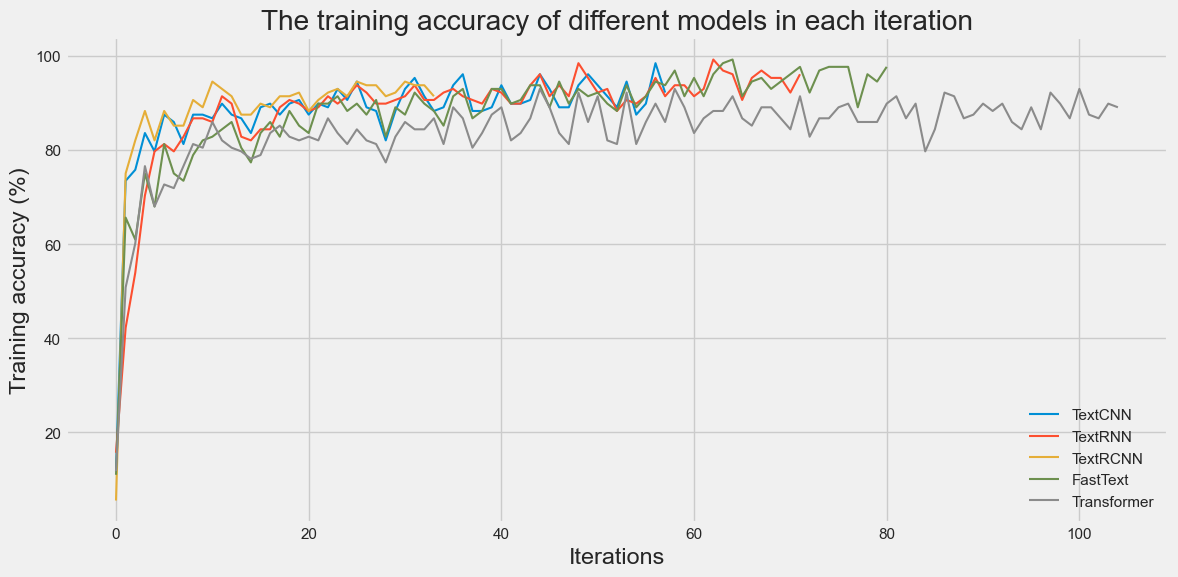

In [220]:
plt.figure(figsize=(12,6))
sns.lineplot(TextCNN_train_acclist,label = "TextCNN",linewidth = 1.5)
sns.lineplot(TextRNN_train_acclist,label = "TextRNN",linewidth = 1.5)
sns.lineplot(TextRCNN_train_acclist,label = "TextRCNN",linewidth = 1.5)
sns.lineplot(FastText_train_acclist,label = "FastText",linewidth = 1.5)
sns.lineplot(Trans_train_acclist,label = "Transformer",linewidth = 1.5)
plt.xlabel("Iterations")
plt.ylabel("Training accuracy (%)")
plt.title("The training accuracy of different models in each iteration")
plt.tight_layout()
plt.savefig("data_output/training_acc_lineplot.svg")

### test acc

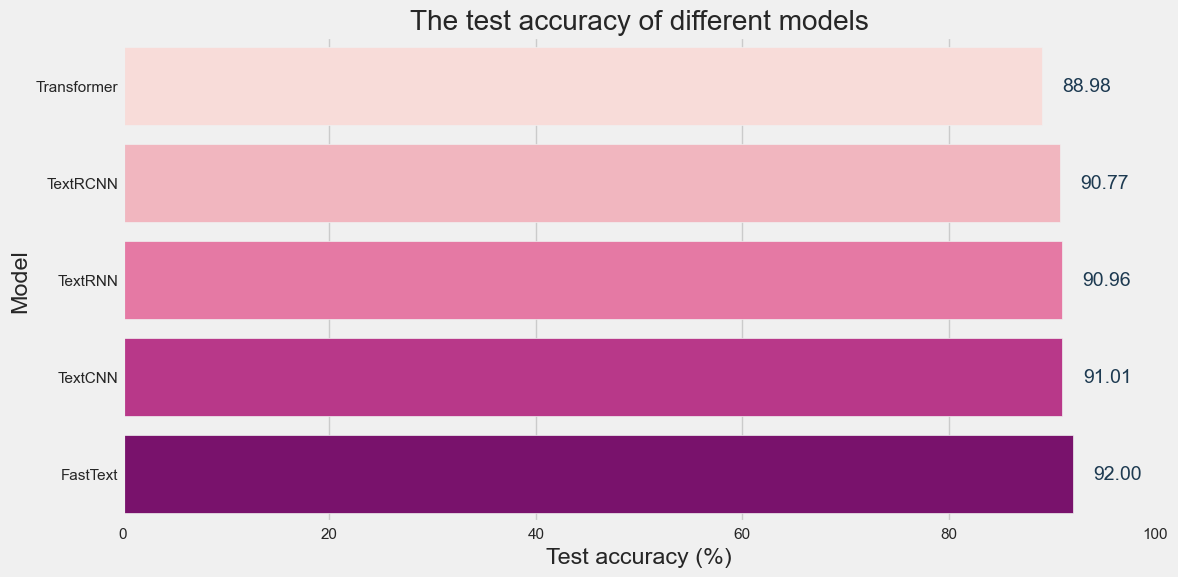

In [222]:
plt.figure(figsize = (12,6))
bar = sns.barplot(data = test_acc_df,y = "model_name",x = "test_acc",orient= "h",palette="RdPu")
plt.xlabel("Test accuracy (%)")
plt.ylabel("Model")
plt.xlim(0,100)

# 遍历每个条形
for p in bar.patches:
    # 获取条形的位置和高度
    x = p.get_x() + p.get_width() + 2
    y = p.get_y() + p.get_height() / 2

    # 在适当的位置添加文本
    bar.text(
        x, y, "{:.2f}".format(p.get_width()), va="center", color="#1d3a51", fontsize=14
    )
plt.title("The test accuracy of different models")
plt.tight_layout()
plt.savefig("data_output/test_acc_barplot.svg")